<a href="https://colab.research.google.com/github/yyeseull/Codestates_AI13/blob/main/AI_13_%EC%84%9C%EC%98%88%EC%8A%AC_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용카드 승인 예측

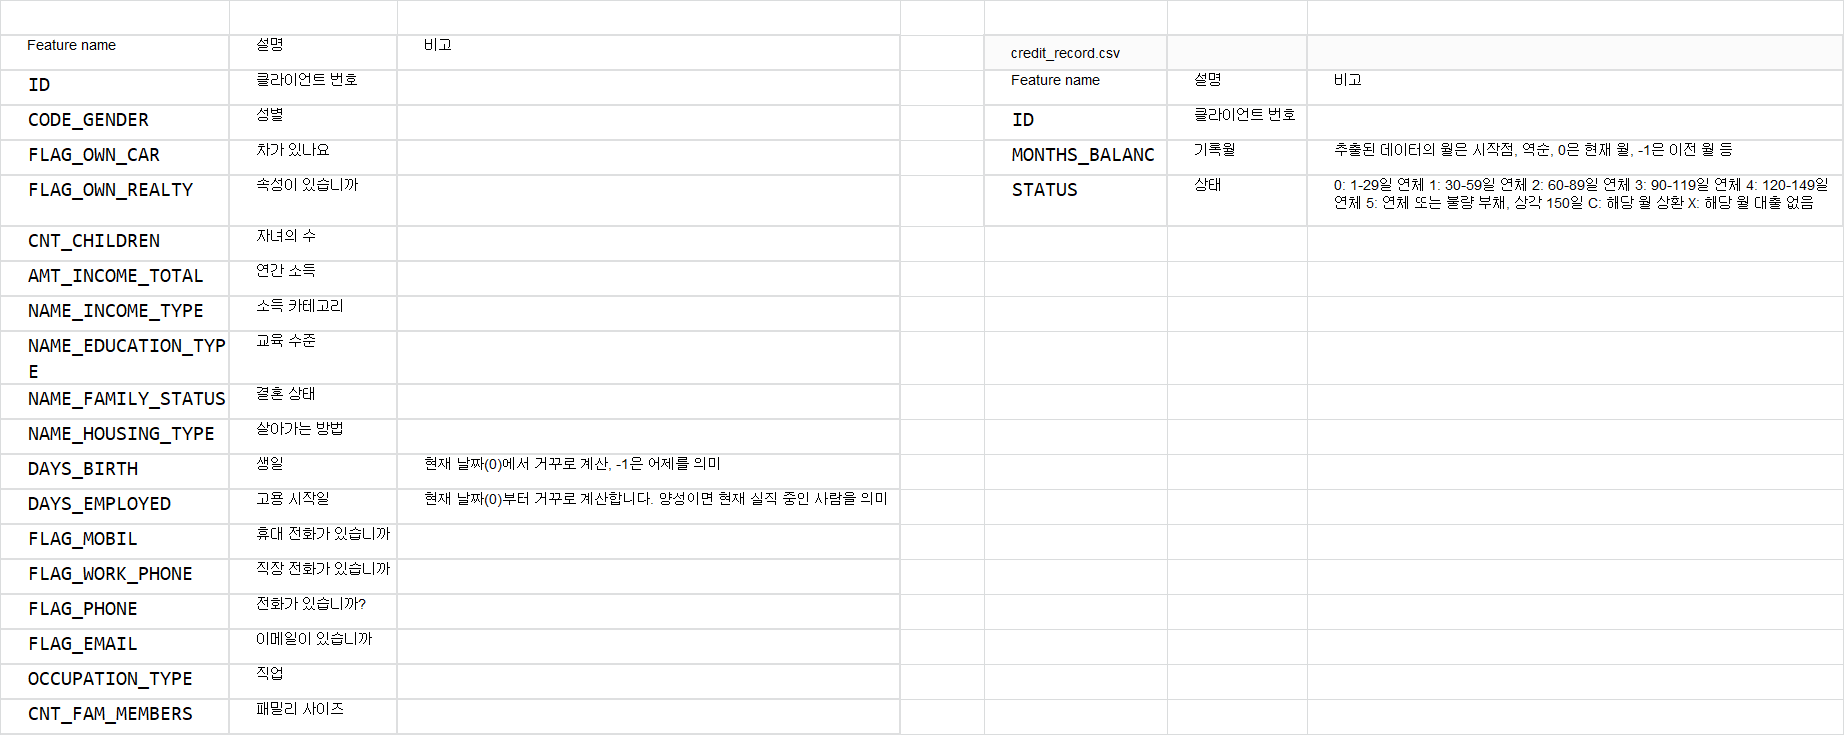

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder, TargetEncoder, OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import LabelEncoder
#import seaborn as sns


from sklearn.pipeline import make_pipeline

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

credit_record=pd.read_csv('/content/drive/MyDrive/archive/credit_record.csv') 
application_record=pd.read_csv('/content/drive/MyDrive/archive/application_record.csv') 


application_record

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
credit_record.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# application_record.T.duplicated() #중복확인


In [6]:
# credit_record.T.duplicated()

# EDA

In [7]:
#결측치확인
application_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
credit_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [10]:
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [11]:
application_record.info

<bound method DataFrame.info of              ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  

In [12]:
credit_record.info

<bound method DataFrame.info of               ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]>

In [13]:
application_record['CNT_FAM_MEMBERS'].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [14]:
application_record.query("CNT_CHILDREN ==2 & CNT_FAM_MEMBERS == 1").head() # 자녀2명인데 가족수가 1인 경우가 있는걸 봐서 가족 인원에 자녀는 포함이 되지 않은 것 같음! 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
434494,5023641,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,1.0
434543,5045457,M,Y,N,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14452,-4249,1,0,0,0,Drivers,1.0
434960,5224385,F,N,N,2,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-13104,-125,1,0,0,0,Laborers,1.0
435100,5307087,M,Y,Y,2,540000.0,Working,Secondary / secondary special,Married,House / apartment,-13718,-2490,1,0,1,0,Managers,1.0
435108,5313528,M,Y,Y,2,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12597,-410,1,0,0,0,Laborers,1.0


In [15]:
application_record.query("DAYS_EMPLOYED >=0 ") 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
76,5008884,F,N,Y,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,1,0,0,0,NaN,1.0
160,5008974,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,1,0,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [16]:
# np.where(application_record["DAYS_EMPLOYED"]  >=0,0,application_record["DAYS_EMPLOYED"])

In [17]:
application_record['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [18]:
application_record['NAME_FAMILY_STATUS'].value_counts()	

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [19]:
 def eda_process(df):
  
  #생일을 나이로 변경! 
  df['DAYS_BIRTH'] = np.abs(df['DAYS_BIRTH']/365).round()
  #고용일 실직 = 0 , 나머지는 년으로 변경!
  df['DAYS_EMPLOYED'] = np.where(df["DAYS_EMPLOYED"] >=0,0,df["DAYS_EMPLOYED"])
  df['DAYS_EMPLOYED'] =np.abs(df['DAYS_EMPLOYED']/365).round()
  #replace column names 
  new_col_name = { 'DAYS_EMPLOYED' : 'YEARS_EMPLOYED',
                   'DAYS_BIRTH' : 'AGE'}
  df.rename(columns = new_col_name,inplace=True)
  #거주형태
  df['NAME_HOUSING_TYPE'] = np.where(df['NAME_HOUSING_TYPE'] =='With parents ','With parents ','apartment')
  #가족수 자녀까지 포함.
  df['CNT_FAM_MEMBERS'] = df['CNT_CHILDREN'] + df['CNT_FAM_MEMBERS']

  dropped_cols = ['CNT_CHILDREN']
  df.drop(dropped_cols,axis=1,inplace=True)
  #가족상태
  family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}
  df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].map(family_status)


  return df


application = eda_process(application_record)

application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Married,apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,427500.0,Working,Higher education,Married,apartment,33.0,12.0,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,apartment,59.0,3.0,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.0,1,0,1,1,Sales staff,1.0


# **타겟**

*   신용카드 승인 거부 : 1
*   신용카드 승인 : 0

In [20]:
credit_record['MONTHS'] = credit_record['MONTHS_BALANCE']*-1
credit_record=credit_record.sort_values(['ID','MONTHS'], ascending=True)
credit_record.head()

,ID,MONTHS_BALANCE,STATUS,MONTHS
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0


In [21]:
credit_record['MONTHS'].value_counts() 

1     34436
2     34209
0     33856
3     33854
4     33365
      ...  
56     2109
57     1649
58     1255
59      820
60      415
Name: MONTHS, Length: 61, dtype: int64

In [22]:
credit_record['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [23]:
credit_record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_record['STATUS'] =credit_record['STATUS'].astype('int')
credit_record['STATUS'] = credit_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)
credit_record

,ID,MONTHS_BALANCE,STATUS,MONTHS
0,5001711,0,0,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,0,0
...,...,...,...,...
1048570,5150487,-25,0,25
1048571,5150487,-26,0,26
1048572,5150487,-27,0,27
1048573,5150487,-28,0,28


In [24]:
credit_record['STATUS'].value_counts() 

0    1045471
1       3104
Name: STATUS, dtype: int64

In [25]:
credit1=pd.DataFrame(credit_record.groupby('ID').sum()['STATUS'])

credit1

,STATUS
ID,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0
...,...
5150482,0
5150483,0
5150484,0


In [26]:
credit2=pd.DataFrame(credit_record.groupby('ID').max()['MONTHS'])
credit2

,MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59
...,...
5150482,28
5150483,17
5150484,12


In [27]:
credit = pd.merge(credit1, credit2, on='ID')


credit

,STATUS,MONTHS
ID,,
5001711,0,3
5001712,0,18
5001713,0,21
5001714,0,14
5001715,0,59
...,...,...
5150482,0,28
5150483,0,17
5150484,0,12


In [28]:
credit['mean'] =credit['STATUS' ]/ credit['MONTHS' ]
credit

,STATUS,MONTHS,mean
ID,,,
5001711,0,3,0.0
5001712,0,18,0.0
5001713,0,21,0.0
5001714,0,14,0.0
5001715,0,59,0.0
...,...,...,...
5150482,0,28,0.0
5150483,0,17,0.0
5150484,0,12,0.0


In [29]:
credit['mean'].value_counts() 

0.000000    44948
0.111111       17
0.071429       12
0.500000       12
0.100000       12
            ...  
0.193548        1
0.483871        1
0.517241        1
0.206897        1
0.343750        1
Name: mean, Length: 239, dtype: int64

In [30]:
credit['APPROVAL'] = credit['mean'].apply(lambda x:0 if x <= 0.65 else 1)
credit.reset_index()

,ID,STATUS,MONTHS,mean,APPROVAL
0,5001711,0,3,0.0,0
1,5001712,0,18,0.0,0
2,5001713,0,21,0.0,0
3,5001714,0,14,0.0,0
4,5001715,0,59,0.0,0
...,...,...,...,...,...
45980,5150482,0,28,0.0,0
45981,5150483,0,17,0.0,0
45982,5150484,0,12,0.0,0
45983,5150485,0,1,0.0,0


In [31]:
credit['APPROVAL'].value_counts() 

0    45585
1      400
Name: APPROVAL, dtype: int64

In [32]:
credit=credit.drop(['STATUS',	'MONTHS',	'mean'], axis=1).reset_index()
credit

,ID,APPROVAL
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


0    0.991302
1    0.008698
Name: APPROVAL, dtype: float64


([<matplotlib.patches.Wedge at 0x7f1e8e997250>,
 [Text(-1.099589303980905, 0.030055990597372285, ''),
  Text(1.0995893063552518, -0.030055903732482677, '')],
 [Text(-0.5997759839895844, 0.01639417668947579, '99.13'),
  Text(0.5997759852846828, -0.016394129308626913, '0.87')])

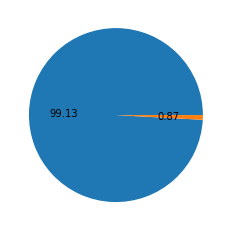

In [33]:
print(credit['APPROVAL'].value_counts(normalize=True,sort=False))
plt.pie(credit['APPROVAL'].value_counts(normalize = True), autopct='%.2f') #데이터 불균형


# **wrangling**

In [34]:
df = pd.merge(credit,application, on='ID',how = 'inner')
df

,ID,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,427500.0,Working,Higher education,Married,apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008805,0,M,Y,Y,427500.0,Working,Higher education,Married,apartment,33.0,12.0,1,1,0,0,NaN,2.0
2,5008806,0,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,apartment,59.0,3.0,1,0,0,0,Security staff,2.0
3,5008808,0,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
4,5008809,0,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,0,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,apartment,30.0,5.0,1,0,0,0,Core staff,4.0
36453,5150483,0,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,apartment,30.0,5.0,1,0,0,0,Core staff,4.0
36454,5150484,0,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,apartment,30.0,5.0,1,0,0,0,Core staff,4.0
36455,5150485,0,F,Y,Y,157500.0,Working,Secondary / secondary special,Married,apartment,30.0,5.0,1,0,0,0,Core staff,4.0


In [35]:
df.describe()

,ID,APPROVAL,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.00000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.009408,1.866857e+05,43.777382,6.03810,1.0,0.225526,0.294813,0.089722,2.628768
std,4.187524e+04,0.096541,1.017892e+05,11.519211,6.48948,0.0,0.417934,0.455965,0.285787,1.608041
min,5.008804e+06,0.000000,2.700000e+04,21.000000,0.00000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.042028e+06,0.000000,1.215000e+05,34.000000,1.00000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.074614e+06,0.000000,1.575000e+05,43.000000,4.00000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115396e+06,0.000000,2.250000e+05,53.000000,9.00000,1.0,0.000000,1.000000,0.000000,4.000000
max,5.150487e+06,1.000000,1.575000e+06,69.000000,43.00000,1.0,1.000000,1.000000,1.000000,39.000000


In [36]:
df.isna().sum()

ID                         0
APPROVAL                   0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
AGE                        0
YEARS_EMPLOYED             0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
dtype: int64

In [37]:
# 결측치 실제 값 확인 -> NaN
df[df["OCCUPATION_TYPE"].isnull()].head(5)

,ID,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,427500.0,Working,Higher education,Married,apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008805,0,M,Y,Y,427500.0,Working,Higher education,Married,apartment,33.0,12.0,1,1,0,0,NaN,2.0
7,5008812,0,F,N,Y,283500.0,Pensioner,Higher education,Single,apartment,62.0,0.0,1,0,0,0,NaN,1.0
8,5008813,0,F,N,Y,283500.0,Pensioner,Higher education,Single,apartment,62.0,0.0,1,0,0,0,NaN,1.0
9,5008814,0,F,N,Y,283500.0,Pensioner,Higher education,Single,apartment,62.0,0.0,1,0,0,0,NaN,1.0


In [38]:
df["OCCUPATION_TYPE"].value_counts() 

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [39]:
df.dtypes

ID                       int64
APPROVAL                 int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                    float64
YEARS_EMPLOYED         float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

# 이상치

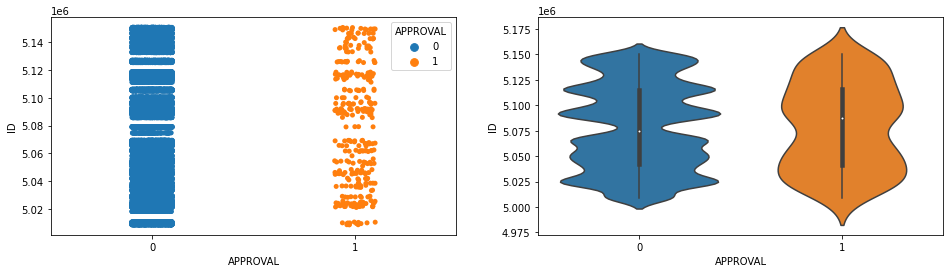

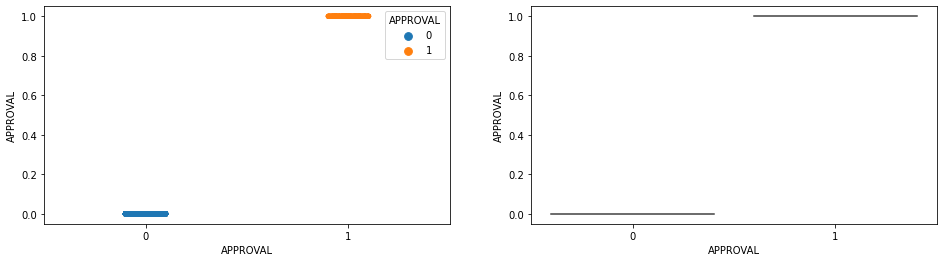

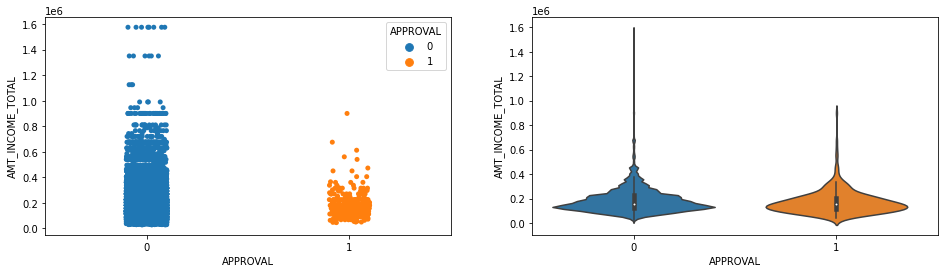

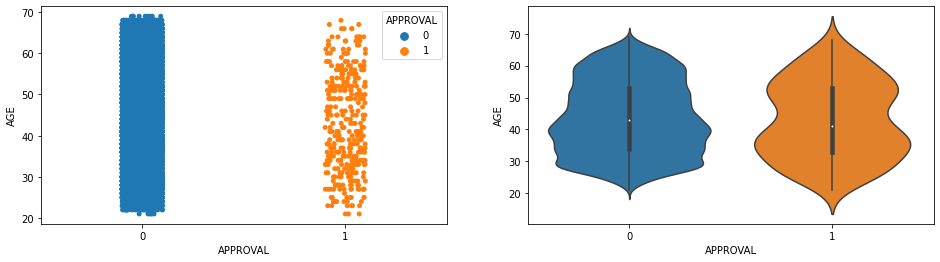

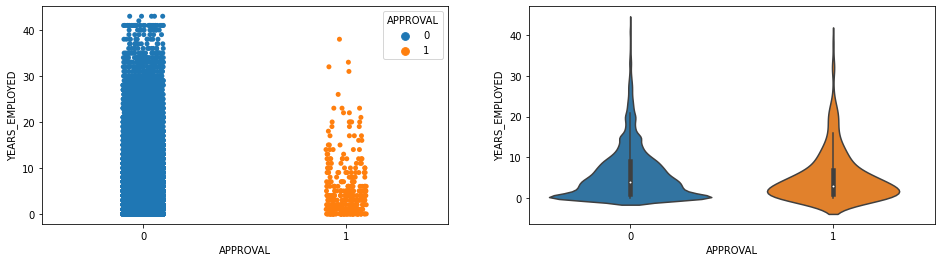

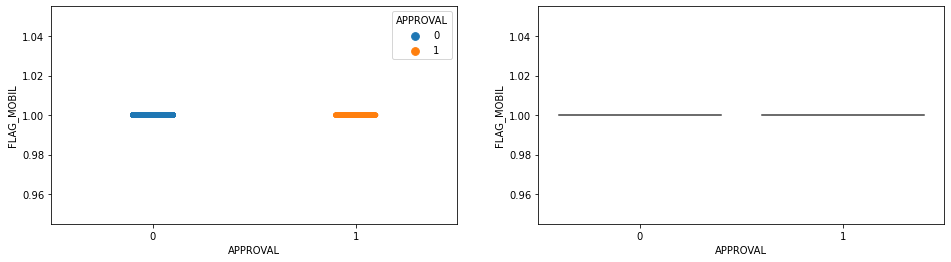

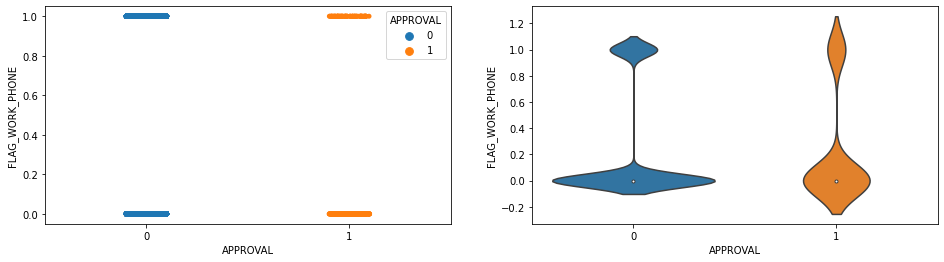

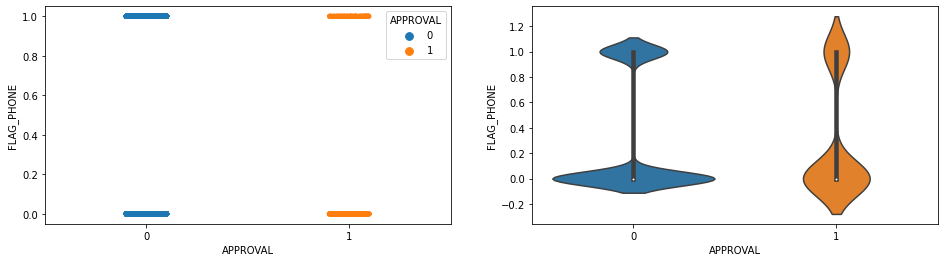

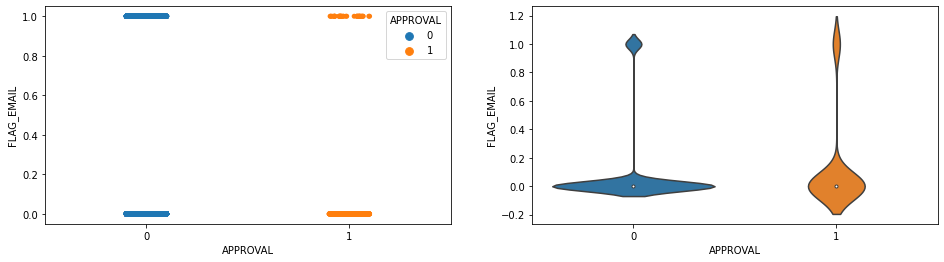

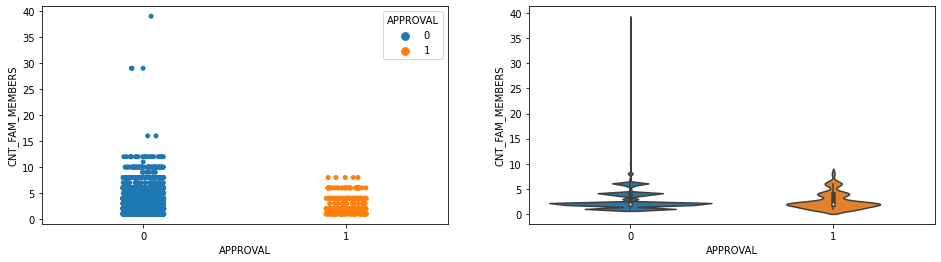

In [40]:
numerical_columns =df.select_dtypes(exclude=['object','int']).columns.tolist()

def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['APPROVAL'],y=df[column], ax=ax[0],hue=df['APPROVAL'])
        sns.violinplot(data=df, x='APPROVAL', y=column, ax=ax[1])
        
show_dist_plot(df, numerical_columns)

In [41]:
#이상치 제거! 싱글인데 가족 구성원 인원이 너무 많은 것으로 보아 지우기로 결정! 
df.query("CNT_FAM_MEMBERS >=20 ")



,ID,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
14132,5061207,0,M,Y,Y,225000.0,Working,Secondary / secondary special,Single,apartment,49.0,5.0,1,0,0,0,Drivers,29.0
14133,5061210,0,M,Y,Y,225000.0,Working,Secondary / secondary special,Single,apartment,49.0,5.0,1,0,0,0,Drivers,29.0
14134,5061211,0,M,Y,Y,225000.0,Working,Secondary / secondary special,Single,apartment,49.0,5.0,1,0,0,0,Drivers,29.0
24753,5105054,0,F,N,Y,112500.0,Working,Secondary / secondary special,Single,apartment,30.0,5.0,1,1,1,0,Waiters/barmen staff,39.0


In [42]:
df=df.query("CNT_FAM_MEMBERS <=20 ")
df.query("CNT_FAM_MEMBERS >=20 ")



,ID,APPROVAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


# **Modeling**

In [43]:
target='APPROVAL'
train, test = train_test_split(df, test_size=0.2, random_state=42)

train, val = train_test_split(train, test_size = 0.20,
                              stratify = train[target], random_state = 42)

print(train.shape, val.shape, test.shape)


(23329, 18) (5833, 18) (7291, 18)


In [44]:
def delete_process(df):
      
    delete = ['FLAG_MOBIL','ID']
    df = df.drop(columns = delete)

    return df

train_processed = delete_process(train)
test_processed = delete_process(test)

In [45]:
features = train_processed.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
594,F,N,N,157500.0,Pensioner,Secondary / secondary special,Single,apartment,56.0,0.0,0,1,0,NaN,1.0
11600,F,N,N,157500.0,Working,Secondary / secondary special,Single,apartment,41.0,8.0,0,0,0,Laborers,1.0
35009,F,N,Y,135000.0,Commercial associate,Secondary / secondary special,Married,apartment,46.0,9.0,1,1,0,Drivers,2.0
370,M,Y,N,337500.0,State servant,Higher education,Married,apartment,28.0,5.0,1,1,0,Managers,2.0
13841,F,N,Y,63000.0,Working,Secondary / secondary special,Married,apartment,55.0,4.0,1,0,0,High skill tech staff,2.0


In [46]:

# def delete_process1(df):
      
#     delete = ['FLAG_MOBIL']
#     df = df.drop(columns = delete)

#     return df

# train_processed = delete_process(train)
# test_processed = delete_process(test)

In [47]:
#기준모델
# logregression = LogisticRegression()
# logregression.fit(X_train, y_train)
# LogisticRegression()
# logregression.score(X_test, y_test)

# logreg_y_pred = logregression.predict(X_test)
# confusion_matrix(y_test, logreg_y_pred)

# print(classification_report(y_test, logreg_y_pred))

In [48]:
# logregression = LogisticRegression()
# logregression.fit(X_train, y_train)


In [49]:
# def fit_trees(X_train, y_train):
   
#     pipe = make_pipeline(
#     OrdinalEncoder(),
#     SimpleImputer(),
#     RandomForestClassifier(n_jobs = -1, oob_score=True,random_state=42))
    
#     dist = {
#     'simpleimputer__strategy': ['mean', 'median'],
#      'randomforestclassifier__n_estimators': range(30,100),
#      'randomforestclassifier__min_samples_leaf':range(1,30),
#      'randomforestclassifier__min_samples_split':range(1,30),
#      'randomforestclassifier__max_depth' : [5, 10 , 15, 20,30,40] 
#      } 
#     clf = RandomizedSearchCV(
#     pipe, 
#     param_distributions = dist,
#     n_iter = 10,
#     cv = 4,
#     scoring = 'f1',
#     verbose = 1,
#     n_jobs = -1)
#     clf.fit(X_train, y_train);
    

#     return clf
# clf = fit_trees(X_train, y_train)

In [50]:
# def get_feature_importances(pipe, feature_names):
#     feature_importances = np.zeros(len(feature_names))

#     # YOUR CODE HERE
#     rf = clf.best_estimator_.named_steps['randomforestclassifier']
#     feature_importances = rf.feature_importances_
    

#     # YOUR CODE ENDS HERE

#     return sorted(
#         list(zip(feature_names, feature_importances)), key=lambda x: x[1], reverse=True
#     )
# feature_importances = get_feature_importances(
#     clf.best_estimator_, list(X_train.columns)
# )
# for name, importance in feature_importances:
#     print(f"{name}: {importance:.4f}")

In [51]:
# labelencoder = LabelEncoder()

# X_train['type'] = labelencoder.fit_transform(X_train['type'])

In [52]:


# smote = SMOTE(random_state = 42)

# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)



In [53]:
# df.best_estimator_.feature_importances_